# KPI time until next rental

### Import libraries




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from haversine import haversine, Unit

sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")




### Data reading function

In [2]:
def read_data(city_name):
    trip_data = pd.read_csv("Project_Data/Combined_Data/"+city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    return trip_data



## KPI description
The KPI "time until next rental" calculates for each individual bike number (b_number), how long it takes until the bike is rented out again. After the inital analysis, we decided to exclude a datapoint if the specific bike hasn't been rented out for more than 7 days because we deemed that it is unrealistic that a bike isn't being rented out for that long and assumed that the bike must have either been defect or Nextbike must have removed it from the street, making it unavailable for rental on both cases.

#### This KPI provides to main indications:
* Based on the average time until next rental, in a specific timeframe or based on the weather, Nextbike can see if a bike hasn't been rented for longer than on average expected, which could indicate that the bike is defect or poorly placed in the city.
* Nextbike can detect general usage patterns of bikes based on the timeframe, weather or location and thereby adapt their bike fleet accordingly and in advance.

### KPI calculation def


In [29]:
# TASK: calculate, for each bike, how long it takes until a specific bike is rented out again. 
#       Starting point is the moment in which the rental of the bike has ended for the first time.
#       Removing datapoints of bikes that haven't been rented our for more than a week (168 hours)
#
def time_until_rental (trip_data):
    difference= []
    
    # running through the dataframe
    for i in range(len(trip_data)-1):
        
        # checking if the bike numbers match, if that is the case, calculate the time difference
        # between the two in hours
        if trip_data["b_number"][i]==trip_data["b_number"][i+1]:
            comp1=trip_data["datetime_start"][i+1]
            comp2=trip_data["datetime_end"][i]
            compare=comp1-comp2
            difference_in=compare.total_seconds()/3600
            
            # exclude datapoint if the bike hasn't been rented out for more than a week
            if difference_in>168:
                difference.append(np.nan)
            else:
                difference.append(difference_in)
        else: 
            difference.append(np.nan)
            
    difference.append(np.nan)
    
    # add column "difference" to dataframe
    trip_data["difference"] = difference 
    


In [30]:
# this function excludes a datapoint if the bike has been rented out again within a week
#
def time_until_rental_removed (trip_data):
    
    difference= []
    
    # running through the dataframe
    for i in range(len(trip_data)-1):
        
        # checking if the bike numbers match, if that is the case, calculate the time difference
        # between the two in hours
        if trip_data["b_number"][i]==trip_data["b_number"][i+1]:
            comp1=trip_data["datetime_start"][i+1]
            comp2=trip_data["datetime_end"][i]
            compare=comp1-comp2
            difference_in=compare.total_seconds()/3600
            
            # exclude datapoint if the bikes hasn't been rented out for more than a week
            if difference_in<=168:
                difference.append(np.nan)
            else:
                difference.append(difference_in)
        else: 
            difference.append(np.nan)
            
    difference.append(np.nan)
    
    # add column "difference" to dataframe
    trip_data["difference"] = difference 
    
    

### Data reading 

In [31]:
dataD= read_data("duesseldorf")
dataD_removed= read_data("duesseldorf")

dataHB= read_data("bremen")
dataHB_removed= read_data("bremen")

In [32]:
time_until_rental(dataD)
time_until_rental(dataHB)
time_until_rental_removed(dataD_removed)
time_until_rental_removed(dataHB_removed)

## Data Plotting

### Data Plotting def

In [42]:
def plot_time_until_rental (trip_data, city):
    
    # removing all rows that have NaN in column "difference"
    temp=trip_data.dropna(axis=0, subset=["difference"])
    
    # create figure and axes
    fig1, (ax1) = plt.subplots(1, 1, figsize=(15,5))
    fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(15,5))
    
    # generate plots
    sns.barplot(x=temp["datetime_end"].dt.hour, y="difference", data=temp, palette="rocket", ax=ax1, ci=None)
    sns.barplot(x=temp["datetime_end"].dt.weekday, y="difference", data=temp, palette="rocket", ax=ax2, ci=None)
    sns.barplot(x=temp["datetime_end"].dt.month, y="difference", data=temp, palette="rocket", ax=ax3, ci=None) 
    
    # add labels
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    ax1.axhline(y = trip_data['difference'].mean(), color='red', linewidth=2, alpha=.7)
    ax1.set(xlabel='Hours', ylabel="Average time until next rental (in h)")
    ax1.set_title(city+": Average time until next rental per hour")

    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    ax2.axhline(y = trip_data['difference'].mean(), color='red', linewidth=2, alpha=.7)
    ax2.set(xlabel='Weekdays', ylabel="Average time until next rental (in h)")
    ax2.set_title(city+": Average time until next rental per weekday")

    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    ax3.axhline(y = trip_data['difference'].mean(), color='red', linewidth=2, alpha=.7)
    ax3.set(xlabel='Month', ylabel="Average time until next rental (in h)")
    ax3.set_title(city+": Average time until next rental per month" ) 
    
def plot_time_until_rental_over_time (trip_data, city):
    
    # removing all rows that have NaN in column "difference"
    temp=trip_data.dropna(axis=0, subset=["difference"])
    # create figure and axes
    fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
    
    # generate plot
    sns.lineplot(ax=ax, data=temp, x=temp["datetime_end"].dt.date, y="difference", ci=None)
   
    # add labels
    ax.set_title(city+": Average time until next rental over time" )
    ax.set_ylabel("Average time until next rental (in h)")
    ax.set_xlabel("Date")
    ax.axhline(y = temp['difference'].mean(), color='red', linewidth=2, alpha=.7)
   
    fig.subplots_adjust(left=0.05, right=0.98, top=0.96, bottom=0.25)
    
def plot_time_until_rental_over_time_temp (trip_data, city, weather):
    
    # removing all rows that have NaN in column "difference"
    temp=trip_data.dropna(axis=0, subset=["difference"])
    
    # create figure and axes
    fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
    
    # generate plot
    sns.lineplot(ax=ax, data=temp, x=temp["datetime_end"].dt.date, y="difference", ci=None)
    ax1=plt.twinx(ax=ax)
    sns.lineplot(ax=ax1, data=temp, x=temp["datetime_end"].dt.date, y=weather, ci=None, color="red")
    
    # add labels
    ax.set_title(city+": Average time until next rental over time" )
    ax.set_ylabel("Average time until next rental (in h)")
    ax.set_xlabel("Date")
    
    #add labels based on weather
    if weather=="rain":
        ax1.set_ylabel("Rain")
        ax1.set_ylim(0, temp["rain"].max())
        
    if weather=="temp":
        ax1.set_ylabel("Temperature")
        ax1.set_ylim(0, temp["temp"].max())
    
    
   
    fig.subplots_adjust(left=0.05, right=0.98, top=0.96, bottom=0.25)


In [34]:
# Counts how many bikes haven't been rented out for more than a week per hour/weekday/month
#
def plot_time_until_rental_removed (trip_data, city):
    
    # removing all rows that have NaN in column "difference"
    temp=trip_data.dropna(axis=0, subset=["difference"])
    
    # create figure and axes
    fig1, (ax1) = plt.subplots(1, 1, figsize=(15,5))
    fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(15,5))
    
    # generate plots
    sns.countplot(x=temp["hour"], data=temp, palette="rocket", ax=ax1)
    sns.countplot(x=temp["weekday"], data=temp, palette="rocket", ax=ax2)
    sns.countplot(x=temp["month"], data=temp, palette="rocket", ax=ax3) 
    
    # add labels
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    ax1.set(xlabel='Hours', ylabel="Amount of bikes")
    ax1.set_title(city+": Average amount of bikes per hour")
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    ax2.set(xlabel='Weekdays', ylabel="Amount of bikes")
    ax2.set_title(city+": Average amount of bikes per weekday")
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
    ax3.set(xlabel='Month', ylabel="Amount of bikes")
    ax3.set_title(city+": Average amount of bikes per month" ) 

### Average time until next rental grouped over hour/weekday/month

#### Duesseldorf

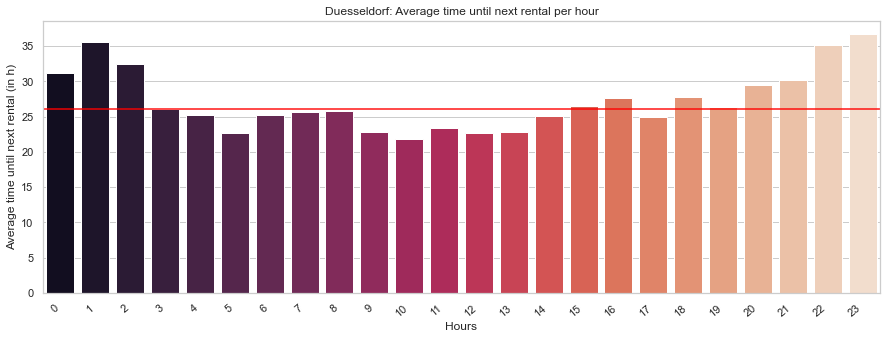

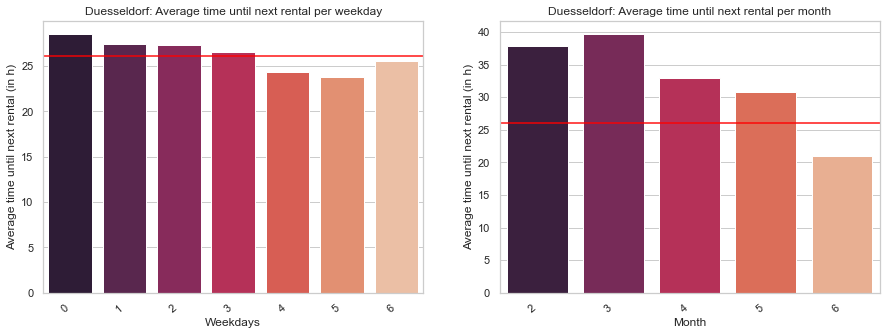

In [35]:
plot_time_until_rental (dataD, "Duesseldorf")

We can see that the time difference between two trips with the same bike is on average close to 26 hours, meaning one bike trip per day. We can also see that the time until next rental is at nighttime on average higher than during the day. 
The weekdays diagram shows that the time until next rental is above average on the first four days of the week and below average on the last three days.
The final diagram displays that the average time until next rental decreases as the months go on with the only anomaly being march.

#### Bremen

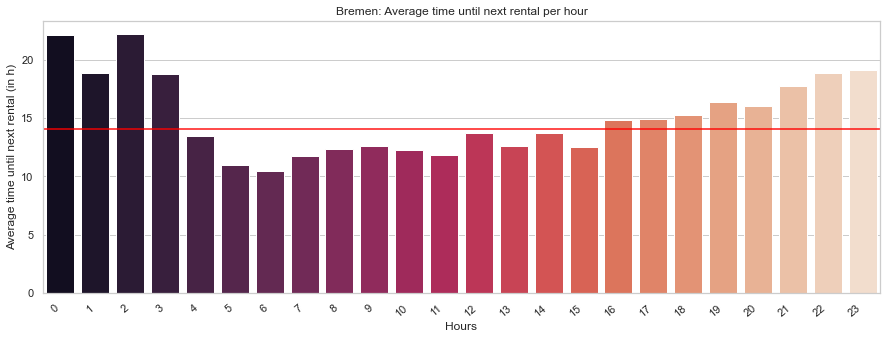

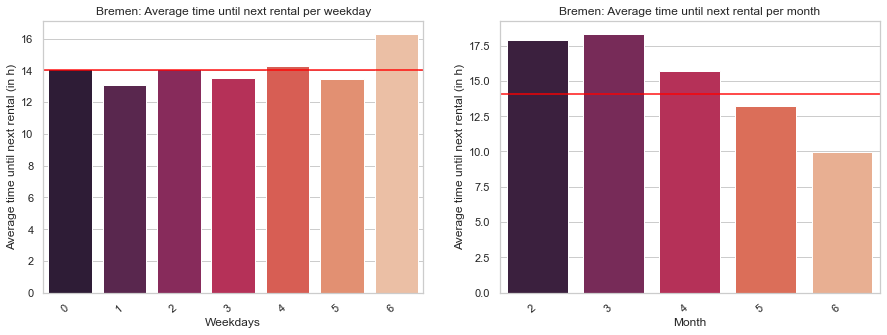

In [85]:
plot_time_until_rental (dataHB, "Bremen")

For Bremen, we can see the same trends as we already depict for Duesseldorf. The only two big differences are that, first, the time until next rental is on average lower in Bremen with an average of around 14 hours, compared to Duesseldorf with nearly 26 hours and second, the time until next rental based on weekdays is close to average on all days of the week except for sunday.

### Average time until next rental over time

#### Duesseldorf

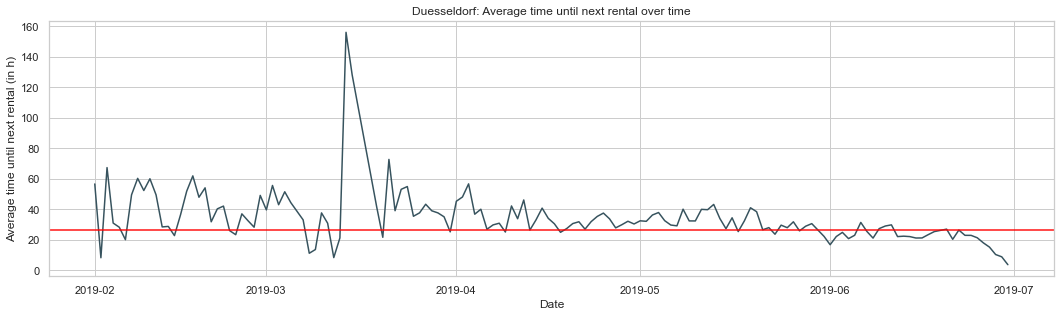

In [43]:
plot_time_until_rental_over_time(dataD, "Duesseldorf")

Noticeably, we can see that the fluctuation in average time until next rental decreases from april onwards. We can also exhibit a lack of data in mid march which causes a big peak in the diagram. 

#### Bremen

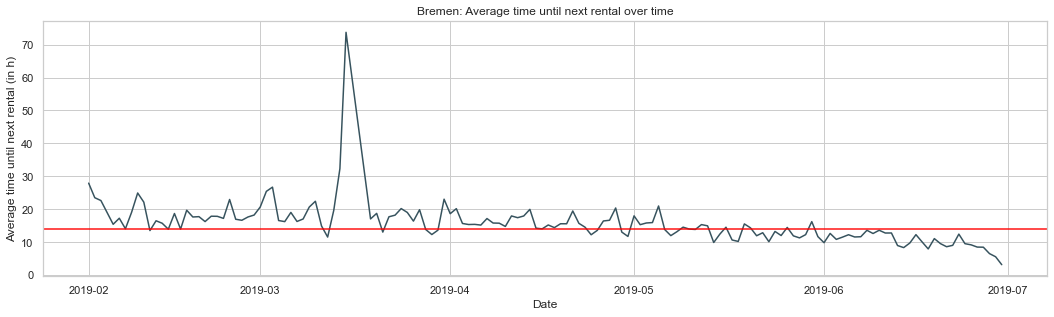

In [44]:
plot_time_until_rental_over_time(dataHB, "Bremen")

Also for Bremen we can see a decrease in fluctuation but not as noticeably as for Duesseldorf. The diagram also indicates a clear trend from above average values at the beginning of the time interval towards below average values from mid may onwards.

### Average time until next rental over time with weather

#### Comparing the average time until next rental with the temperature

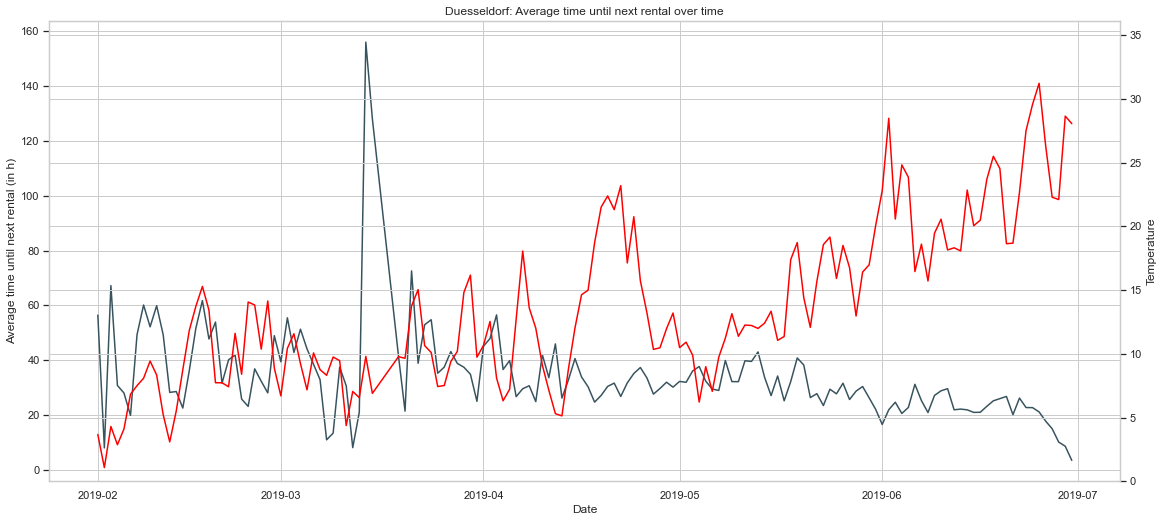

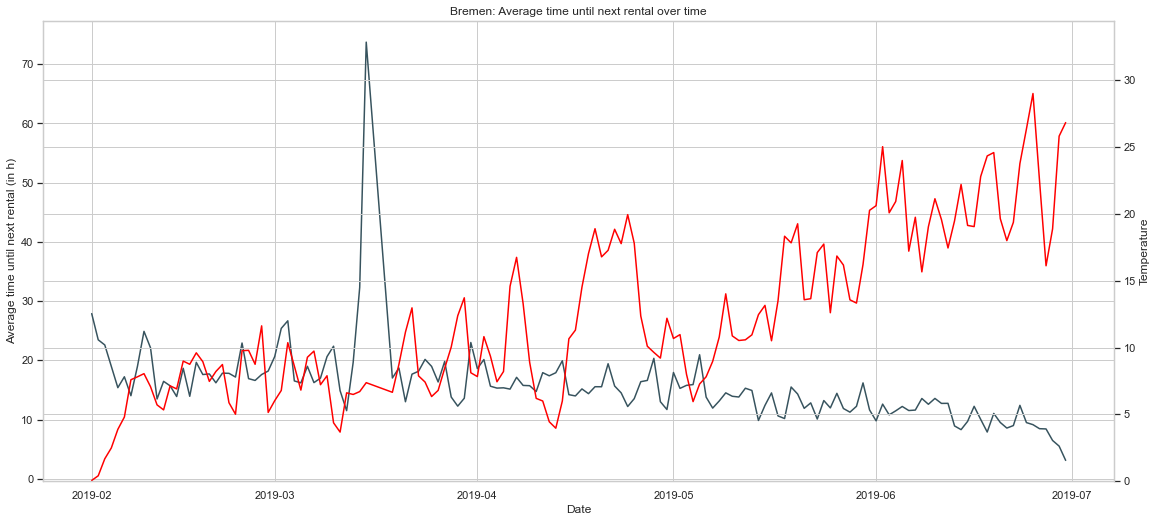

In [47]:
plot_time_until_rental_over_time_temp(dataD, "Duesseldorf", "temp")
plot_time_until_rental_over_time_temp(dataHB, "Bremen", "temp")

The diagrams highlight a clear trend between raising temperatures and a decrease in average time until next rental

#### Comparing the average time until next rental with rain

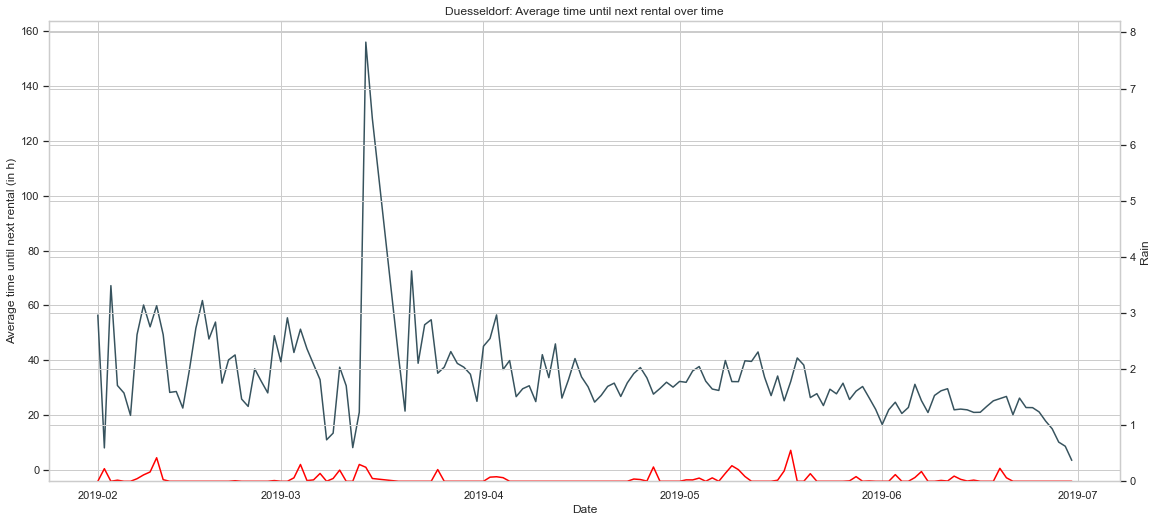

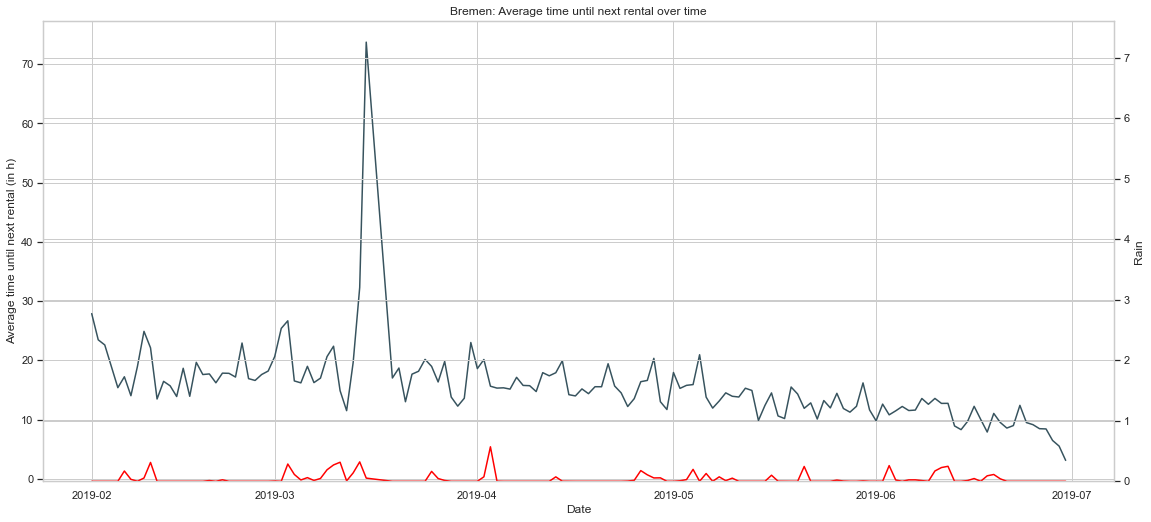

In [48]:
plot_time_until_rental_over_time_temp(dataD, "Duesseldorf", "rain")
plot_time_until_rental_over_time_temp(dataHB, "Bremen", "rain")

We can see some correlation between rain and the time until next rental as well, which could explain why the average time until next rental per month peaked in march.

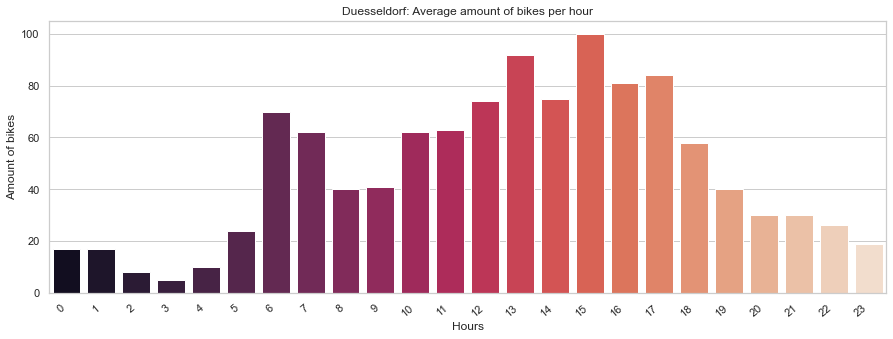

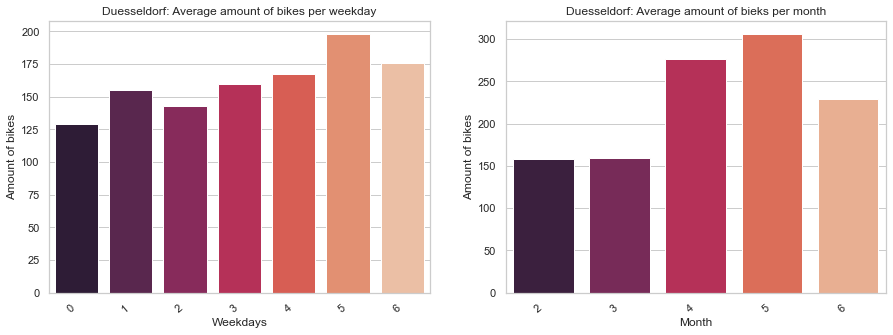

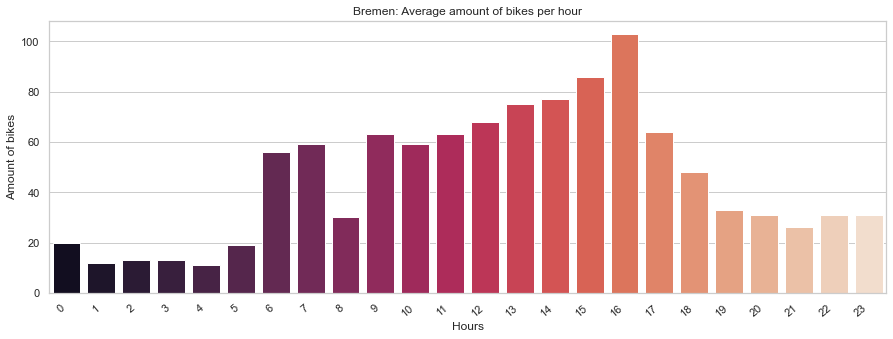

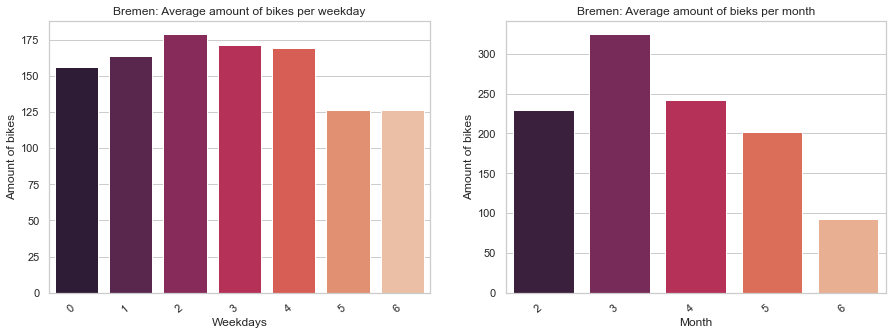

In [50]:
plot_time_until_rental_removed (dataD_removed, "Duesseldorf")
plot_time_until_rental_removed (dataHB_removed, "Bremen")